Life Expectancy and GDP Analysis

In this project, we will analyse data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

The dataset is saved as a csv file named 'all_data.csv'. The data includes:

Country: the name of the nation
Year: the year the data was taken
life expectancy at birth (years): the amount of years a person can expect to live in years
GDP: the gross domestic product of the nation



I will change the name United States of America for Usa

In [81]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.read_csv("all_data.csv")
df["Country"] = df["Country"].replace("United States of America", "USA")
df.head()
print(df)

     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]


At first, We can see that GDP is not well described, to many decimals and its 
difficult to say the real value, so We are going to convert the float in integer 
for the number to be round, we will remove also 6 ceros for the numbers to be described 
in billions.

In [82]:
df.describe(include = "all")
print(df.dtypes)
df["GDP"] = df["GDP"]/1000000
df["GDP"] = df["GDP"].round(2).astype(int)
print(df["Country"].unique())
print(df)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
     Country  Year  Life expectancy at birth (years)    GDP
0      Chile  2000                              77.3  77860
1      Chile  2001                              77.3  70979
2      Chile  2002                              77.8  69736
3      Chile  2003                              77.9  75643
4      Chile  2004                              78.0  99210
..       ...   ...                               ...    ...
91  Zimbabwe  2011                              54.9  12098
92  Zimbabwe  2012                              56.6  14242
93  Zimbabwe  2013                              58.0  15451
94  Zimbabwe  2014                              59.2  15891
95  Zimbabwe  2015                              60.7  16304

[96 rows x 4 columns]


Boxplot for GDP and Life Expectancy



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chile'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Zimbabwe')])

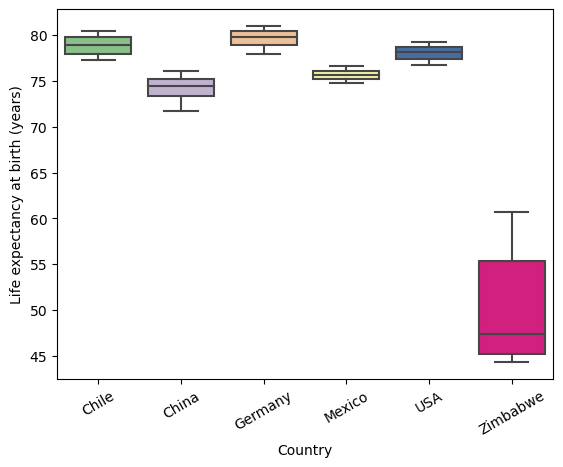

In [83]:
sns.boxplot(x = "Country", y = "Life expectancy at birth (years)", data = df, palette = "Accent")
plt.xticks(rotation = 30)

Here we can see a big difference between Zimbabwe and the rest of the countries. This is telling us that the distribution and mean of Zimbabwe is very far away of the rest of the countries on this study. In order to compare the rest of the countries, We will proceed with another boxplot and excluding Zimbabwe on this plot.

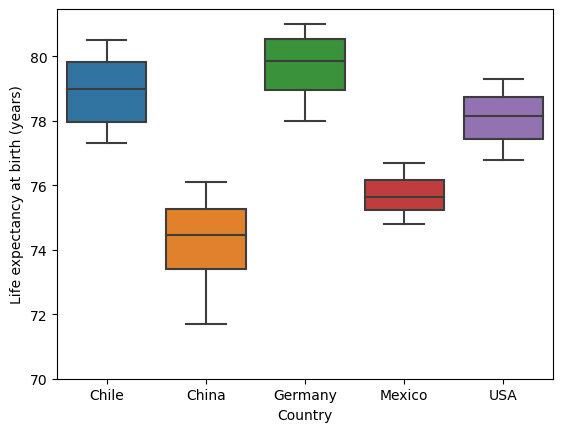

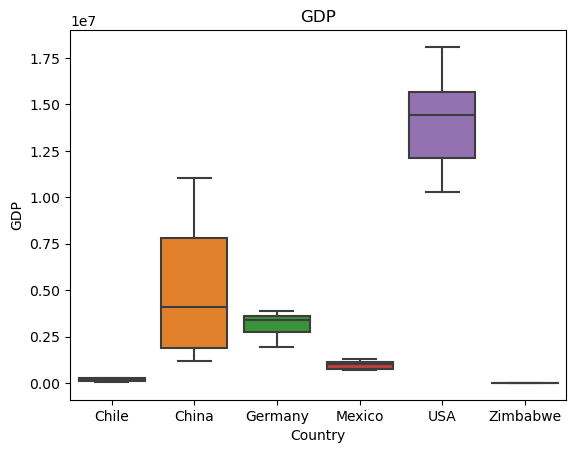

<Figure size 640x480 with 0 Axes>

In [84]:

five_countries = ["Chile", "China", "USA", "Germany", "Mexico"]
# filtered_years = df_filtered[(df_filtered["Life expectancy at birth (years)"])>=70]   Habia hecho este codigo antes y no funcionaba. Ahora se porqué y es que este filtro es para solo incluir los datos desde 70 no para establecer el y axis a partir de 70. Para eso esta el codio anteultimo
df_filtered = df[df["Country"].isin(five_countries)]
sns.boxplot(x = "Country", y = "Life expectancy at birth (years)", data = df_filtered)
plt.ylim(70, None)      #este un muy buen codigo, esta dando un limite al axis y para comenzar en 70
plt.show()
plt.clf()

#GDP

sns.boxplot(x = "Country", y = "GDP", data = df)
plt.title("GDP")
plt.show()
plt.clf()


At this point, on the GDP boxplot, We can see that even if we remove Zimbabwe from the boxplot for GDP is does not change a lot. That is because there is still a big gap in the GDP for some countries for exemple between USA and Chili, where the GDP for USA is 80 times the GDP for Chili. At this point, it is important to highlight the fact that for GDP comparissons it would be a lot better the GDP per capita for each country.  That is the GDP divided the total population. This metrix would tell us the relative differences of wealth for each country

Bar Graphs


We have proceed before to present the averages values for GDP and Life expectation

Now, we will proceed with the bar charts

    Country       GDP
0     Chile    169789
1     China   4957714
2   Germany   3094776
3    Mexico    976651
4       USA  14075000
5  Zimbabwe      9062
Country
Chile       78.94375
China       74.26250
Germany     79.65625
Mexico      75.71875
USA         78.06250
Zimbabwe    50.09375
Name: Life expectancy at birth (years), dtype: float64


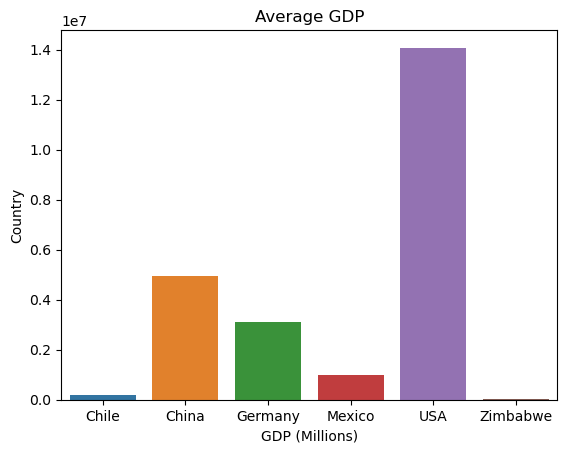

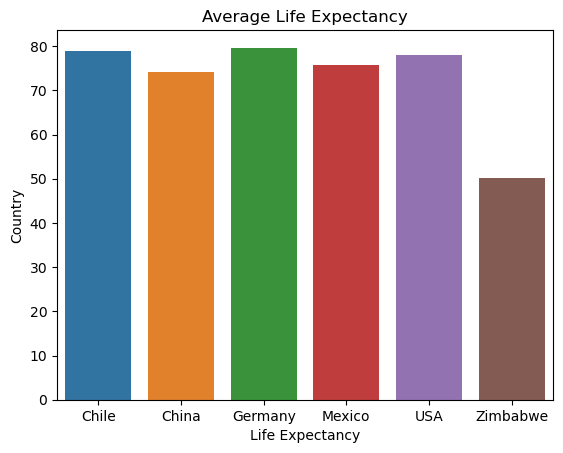

<Figure size 640x480 with 0 Axes>

In [102]:

gdp_mean = df.groupby("Country")["GDP"].mean().reset_index()
gdp_mean["GDP"] = (gdp_mean["GDP"]).round(0).astype(int)
print(gdp_mean)
Life_mean = df.groupby("Country")["Life expectancy at birth (years)"].mean()
print(Life_mean)

sns.barplot(x="Country", y="GDP", data = gdp_mean)
plt.ylabel('Country')
plt.xlabel('GDP (Millions)')
plt.title("Average GDP")
plt.show()



sns.barplot(x = Life_mean.index, y = Life_mean.values)
plt.ylabel('Country')
plt.xlabel('Life Expectancy')
plt.title("Average Life Expectancy")
plt.show()
plt.clf()



Correlation GDP and Life expectancy

At firts we will create a table with the correlations between GDP and Life expectancy
We will create a loop to iterate through countries in df and create a scatterplot in order to know the correlation between GDP and Life expectancy

Country      
Chile     GDP    0.949877
China     GDP    0.908526
Germany   GDP    0.932699
Mexico    GDP    0.932238
USA       GDP    0.981709
Zimbabwe  GDP    0.966194
Name: Life expectancy at birth (years), dtype: float64


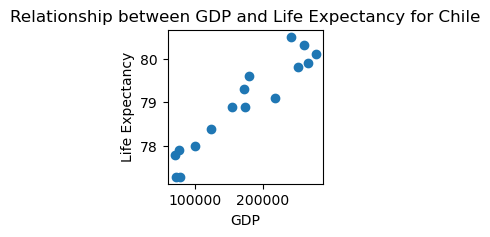

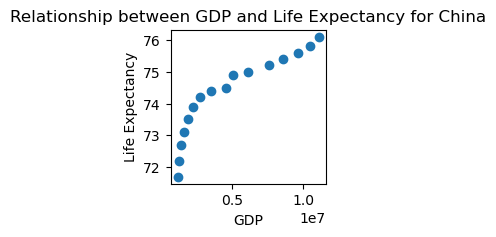

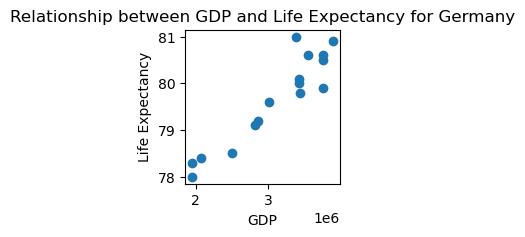

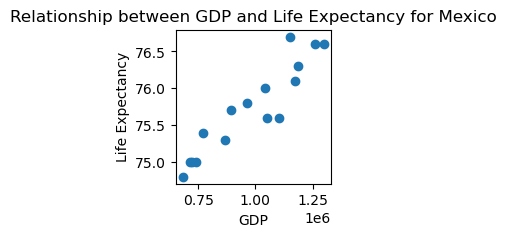

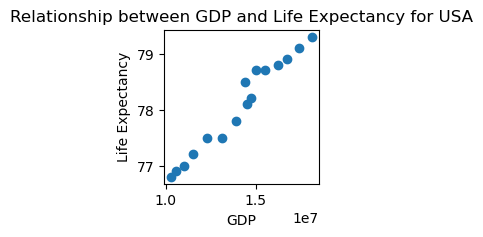

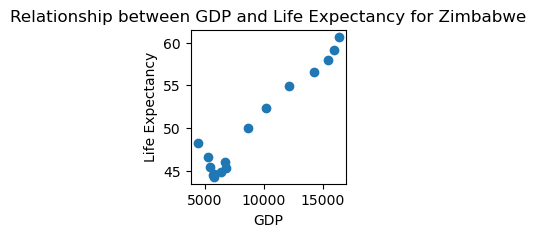

In [29]:
from scipy.stats import pearsonr

correlation_by_country = df.groupby("Country")[["GDP", "Life expectancy at birth (years)"]].corr().iloc[0::2, -1]

# Print the correlation for each country
print(correlation_by_country)

import matplotlib.pyplot as plt

countries = df["Country"].unique()

for country in countries:
    plt.figure(figsize = (2,2))
    country_data = df[df["Country"] == country]
    gdp = country_data["GDP"]
    life_expectancy = country_data["Life expectancy at birth (years)"]
    
    plt.scatter(gdp, life_expectancy)
    plt.xlabel("GDP")
    plt.ylabel("Life Expectancy")
    plt.title(f"Relationship between GDP and Life Expectancy for {country}")
    plt.show()

Conclusion:

We can see at first that the measure of GDP as only instrument to validate a higher Life expectancy is not good enough. Because, for exemple we can see that Usa have a GDP 83 times higher thant Chile, but Chile in the other hand have a higher average Life expectancy 78.94 against 78.03. So, at this point we can say that there are some missing variables we could use to determine better the differences on the life expectancy. Once exemple may be GDP per capita, variable showing the GDP divided by the total population and seing the relative GDP. Another can be some variables related to medical access for the population, average age of retiring, etc. 



In the other hand, we can see that GDP gives us a good measure of life expentancy in cases of extremes exemples, in this case Zimbabwe, being the lowest GDP of the list by far and having the lowest also Life expectancy with 50.09. So, this can be telling us there is a certain correlation between GDP and Life expectancy, mainly in terms of a minimun wealth required to improve the life expectancy of the population.
Besides, we can see that there’s a correlation between GDP and Life expectancy, for the results showed on the correlation between gdp growth and Life expectancy growth between 2000 and 2015: all six countries showed a correlation higher than 0.90 showing a strong correlation between this two variables.
